In [1]:
import pandas as pd

In [2]:
# Loading dataset function

def add_delays(df):
    for index, row in df.iterrows():
        if df.loc[index, "Time"] == df.iloc[0]["Time"]:
            df.loc[index, "Time_diff"] = 0
        else:
            df.loc[index, "Time_diff"] = df.loc[index, "Time"]-last_time
        last_time = df.loc[index, "Time"]


def creation_dataframe_from_csv(experiment_number=3, experimenter='nic'):

    "The file names I used are in the following format : 'experiment3_nic.csv', where '3' and 'nic' can ba changed"

    df = pd.read_csv(r"experiment%d_%s.csv" %(experiment_number, experimenter), delimiter=',')
    df.set_index(['No.'], inplace=True, drop=True)
    add_delays(df)  # addition of the inter_times columns
    return df


In [3]:
# Function to explore the DataFrame

def exploration_dataframe(df):
    print("\nThis dataset contains the following colmuns. We also print the type of each data and and example :")
    for column in df.columns:
        print(column, type(df.iloc[1][column]), df.iloc[1][column])

    print("\nThe following protocols are used in this dataset :\n", df['Protocol'].unique())
    print("\nThe following IP sources are sending packets of this dataset :\n", df['Source'].unique())
    print("\nThe following IP destination are receiving packets of this dataset :\n", df['Destination'].unique())

In [4]:
# Function tat performs a filter on the dataset (filter on protocol, source, destination, times and length)

def lines_selection(df, source='all', destination='all', protocol='all', length_range='all', time_range='all', time_diff_range='all'):

    """
    source : string with IP adress
    destination : string with IP adress
    protocol : string with protocol name
    length_range : string with the following format : "[length_min,length_max]" without space and with a ":" insetad of a length when we don't specify the min nor the max length
    time_range and time_diff_range : idem
    """

    selected_df = df
    if source != 'all':
        selected_df = selected_df.loc[selected_df['Source']==source]

    if destination != 'all':
        selected_df = selected_df.loc[selected_df['Destination']==destination]

    if protocol != 'all':
        selected_df = selected_df.loc[selected_df['Protocol']==protocol]

    if length_range != 'all':
        coma_index = length_range.find(',')
        if length_range[coma_index-1] != ":":
            selected_df = selected_df.loc[selected_df['Length']>=float(length_range[1:coma_index])]
        if length_range[coma_index+1] != ":":
            selected_df = selected_df.loc[selected_df['Length']<=float(length_range[coma_index+1:-1])]

    if time_range != 'all':
        coma_index = time_range.find(',')
        if time_range[coma_index-1] != ":":
            selected_df = selected_df.loc[selected_df['Time']>=float(time_range[1:coma_index])]
        if time_range[coma_index+1] != ":":
            selected_df = selected_df.loc[selected_df['Time']<=float(time_range[coma_index+1:-1])]

    if time_diff_range != 'all':
        coma_index = time_diff_range.find(',')
        if time_diff_range[coma_index-1] != ":":
            selected_df = selected_df.loc[selected_df['Time_diff']>=float(time_diff_range[1:coma_index])]
        if time_diff_range[coma_index+1] != ":":
            selected_df = selected_df.loc[selected_df['Time_diff']<=float(time_diff_range[coma_index+1:-1])]


    return selected_df


In [5]:
# the functions we use, that computes intersting statistics

def compute_packet_length(df, source='all', destination='all', protocol='all', length_range='all', time_range='all', time_diff_range='all', bins=20):
    selected_df = lines_selection(df, source, destination, protocol, length_range, time_range, time_diff_range)
    selected_df.hist(column='Length', bins=bins, figsize=(15, 10))

def compute_packet_number(df, source='all', destination='all', protocol='all', length_range='all', time_range='all', time_diff_range='all'):
    selected_df = lines_selection(df, source, destination, protocol, length_range, time_range, time_diff_range)
    print(selected_df.count()[0])

def compute_packet_length_mean(df, source='all', destination='all', protocol='all', length_range='all', time_range='all', time_diff_range='all'):
    selected_df = lines_selection(df, source, destination, protocol, length_range, time_range, time_diff_range)
    print(selected_df["Length"].mean())

def compute_packet_length_std(df, source='all', destination='all', protocol='all', length_range='all', time_range='all', time_diff_range='all'):
    selected_df = lines_selection(df, source, destination, protocol, length_range, time_range, time_diff_range)
    print(selected_df["Length"].std())
    


In [6]:
# loading of dataFrames

df_0_mart = creation_dataframe_from_csv(experiment_number=0, experimenter='mart') # this is a test csv file I generated with wirehsark
df_3_nic = creation_dataframe_from_csv()

exploration_dataframe(df_0_mart)
exploration_dataframe(df_3_nic)


This dataset contains the following colmuns. We also print the type of each data and and example :
Time <class 'numpy.float64'> 0.144051
Source <class 'str'> 2a01:e0a:563:860:8cc3:861:7346:d3ec
Destination <class 'str'> 2a00:1450:4007:809::2002
Protocol <class 'str'> TCP
Length <class 'numpy.int64'> 75
Info <class 'str'> 49860  >  443 [ACK] Seq=1 Ack=1 Win=258 Len=1 [TCP segment of a reassembled PDU]
Time_diff <class 'numpy.float64'> 0.144051

The following protocols are used in this dataset :
 ['TCP' 'SSDP' 'DNS' 'MDNS' 'UDP' 'ARP' 'TLSv1.2' 'HTTP' 'BROWSER'
 'HTTP/XML' 'TLSv1.3' 'NBNS' 'LLMNR' 'ICMPv6' 'AJP13']

The following IP sources are sending packets of this dataset :
 ['2a01:e0a:563:860:8cc3:861:7346:d3ec' '2a00:1450:4007:809::2002'
 '2404:6800:400a:807::2003' '192.168.0.17' '192.168.0.39' '34.250.19.191'
 '2a00:1450:400c:c00::bc' '2a00:1288:110:c104::2000' '2a01:e0a:563:860::1'
 '192.168.0.254' '2a00:1450:4007:80b::200a' '192.168.0.24' '192.168.0.9'
 '192.168.0.7' '152.199.2

the total number of packets is : 	
9483
the number of TCP packets is : 	
9481
the number of HTTP packets is : 	
2
the histogram of TCP packet length is : 

the mean of TCP packet length is : 	
1019.5770488345112
the standard deviation of TCP packet length is : 	
683.4868325047422
the histogram of HTTP packet length is : 

the mean of HTTP packet length is : 	
383.5
the standard deviation of HTTP packet length is : 	
299.10616844190963


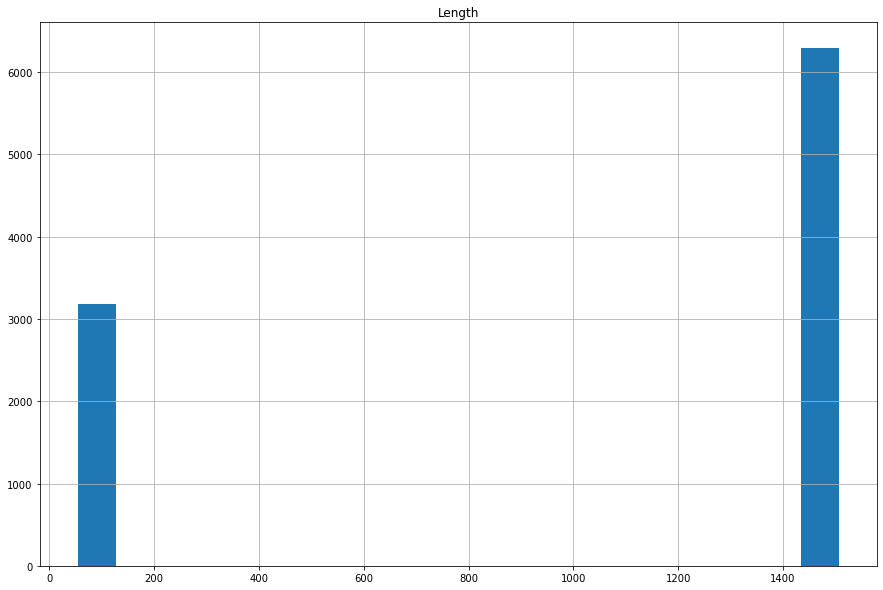

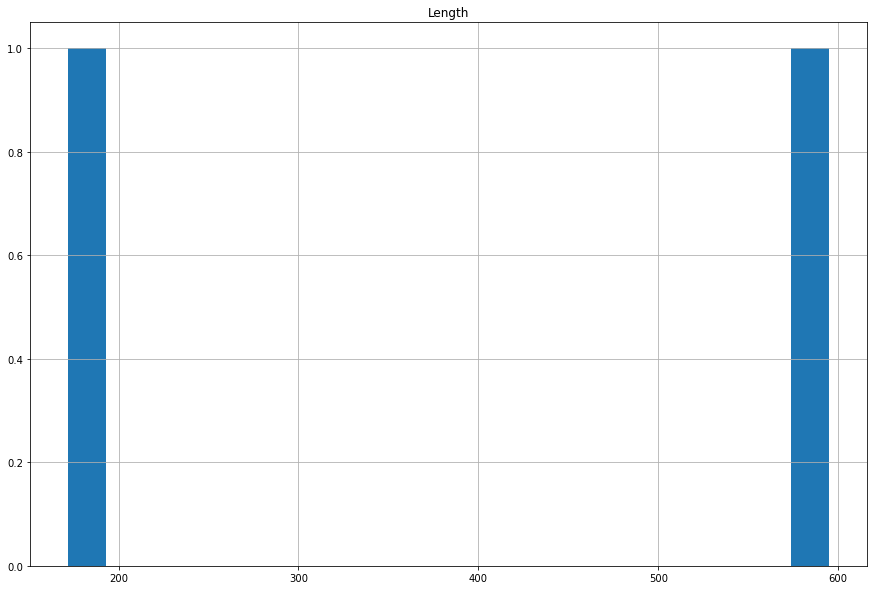

In [7]:
# computation of the statisctics
print("the total number of packets is : \t")
compute_packet_number(df_3_nic)
print("the number of TCP packets is : \t")
compute_packet_number(df_3_nic, protocol='TCP')
print("the number of HTTP packets is : \t")
compute_packet_number(df_3_nic, protocol='HTTP')

print("the histogram of TCP packet length is : \n")
compute_packet_length(df_3_nic, protocol='TCP')
print("the mean of TCP packet length is : \t")
compute_packet_length_mean(df_3_nic, protocol='TCP')
print("the standard deviation of TCP packet length is : \t")
compute_packet_length_std(df_3_nic, protocol='TCP')
print("the histogram of HTTP packet length is : \n")
compute_packet_length(df_3_nic, protocol='HTTP')
print("the mean of HTTP packet length is : \t")
compute_packet_length_mean(df_3_nic, protocol='HTTP')
print("the standard deviation of HTTP packet length is : \t")
compute_packet_length_std(df_3_nic, protocol='HTTP')



the total number of packets is : 	
9483
the number of TCP packets is :
9481
the histogram of TCP packet length is : 

the mean of TCP packet length is :
1019.5770488345112
the standard deviation of TCP packet length is :
683.4868325047422
the number of HTTP packets is :
2
the histogram of HTTP packet length is : 

the mean of HTTP packet length is :
383.5
the standard deviation of HTTP packet length is :
299.10616844190963


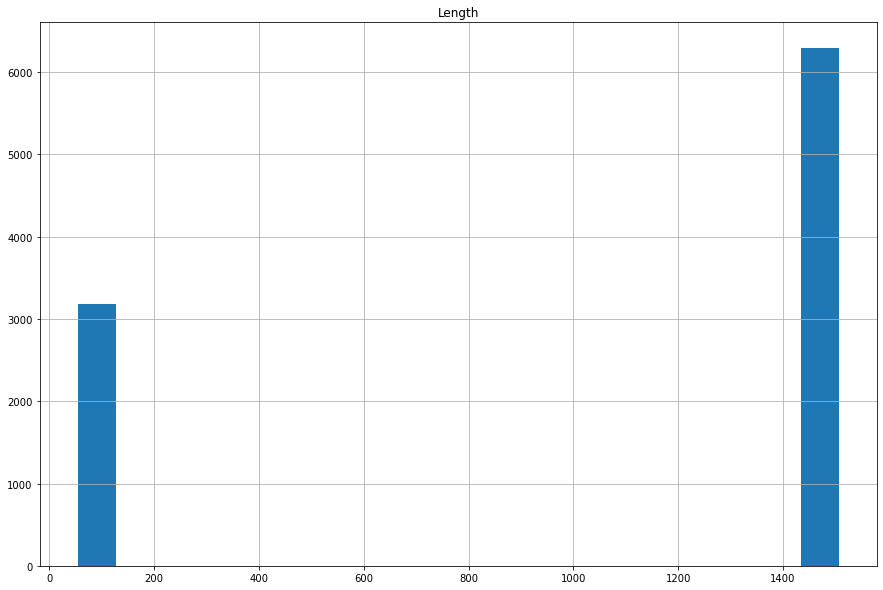

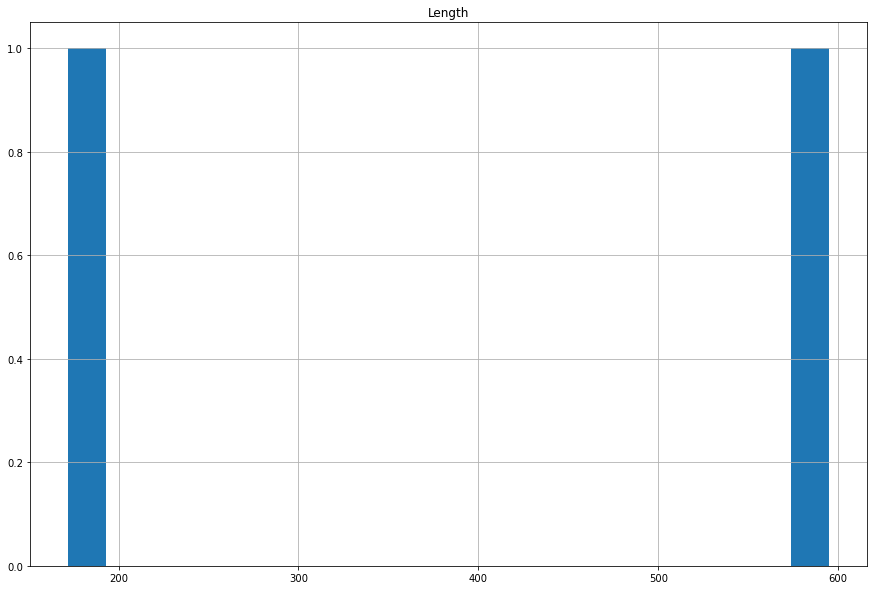

In [9]:
print("the total number of packets is : \t")
compute_packet_number(df_3_nic)
for protocol in df_3_nic['Protocol'].unique():
    print("the number of %s packets is :" %protocol)
    compute_packet_number(df_3_nic, protocol=protocol)

    print("the histogram of %s packet length is : \n" %protocol)
    compute_packet_length(df_3_nic, protocol=protocol)
    print("the mean of %s packet length is :" %protocol)
    compute_packet_length_mean(df_3_nic, protocol=protocol)
    print("the standard deviation of %s packet length is :" %protocol)
    compute_packet_length_std(df_3_nic, protocol=protocol)
    